In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
#Downloading the dataset
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 33.3MB/s]


In [3]:
mobile_sales = pd.read_excel("mobilesales.xlsx")

In [4]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [5]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [6]:
#Make the timestamp column index
mobile_sales.set_index("DATE",inplace=True)

In [7]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


#Imputing Missing Values

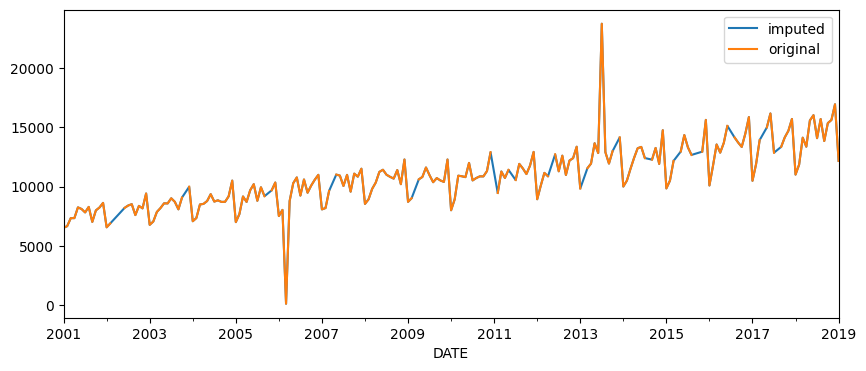

In [8]:
#Linear Interpolation
mobile_sales.Sales.interpolate(method="linear").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [9]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method="linear")

#Handling ANomalies

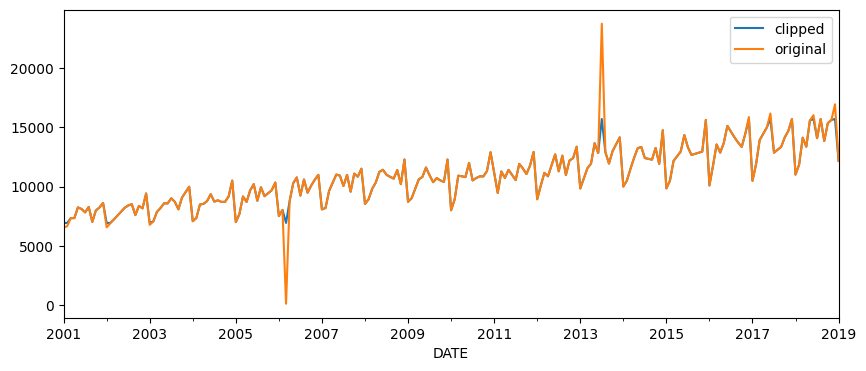

In [10]:
mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975)).plot(label="clipped")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [11]:
mobile_sales.Sales = mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975))

In [12]:
mobile_sales.Sales.rolling(window=3).mean()

DATE
2001-01-01             NaN
2001-02-01             NaN
2001-03-01     7061.866667
2001-04-01     7196.933333
2001-05-01     7634.666667
                  ...     
2018-09-01    14538.333333
2018-10-01    14962.000000
2018-11-01    14934.666667
2018-12-01    15555.733333
2019-01-01    14492.066667
Name: Sales, Length: 217, dtype: float64

In [13]:
#Centered MA
mobile_sales.Sales.rolling(window=3,center=True).mean()

DATE
2001-01-01             NaN
2001-02-01     7061.866667
2001-03-01     7196.933333
2001-04-01     7634.666667
2001-05-01     7892.000000
                  ...     
2018-09-01    14962.000000
2018-10-01    14934.666667
2018-11-01    15555.733333
2018-12-01    14492.066667
2019-01-01             NaN
Name: Sales, Length: 217, dtype: float64

#Train Test Split

In [14]:
train_x = mobile_sales[mobile_sales.index<mobile_sales.index[-12]]
test_x = mobile_sales[mobile_sales.index>=mobile_sales.index[-12]]
display(train_x.tail(2))
display(test_x.head(2))

,Sales
DATE,
2017-12-01,15701.2
2018-01-01,11005.0


,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0


In [15]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

#Moving Average Forecasting

In [16]:
df = mobile_sales.copy()

In [18]:
df.tail(3)

,Sales
DATE,
2018-11-01,15615.0
2018-12-01,15701.2
2019-01-01,12160.0


In [17]:
pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=12,freq='MS'))

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01


In [22]:
df = pd.concat([df,pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS'))[1:]])

print(df.tail(20))

              Sales
2018-06-01  15701.2
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  15701.2
2019-01-01  12160.0
2019-02-01      NaN
2019-03-01      NaN
2019-04-01      NaN
2019-05-01      NaN
2019-06-01      NaN
2019-07-01      NaN
2019-08-01      NaN
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN


In [23]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([15701.2       , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 15701.2       , 12160.        ,
       14492.06666667, 14117.75555556, 13589.94074074, 14066.58765432,
       13924.76131687, 13860.42990398, 13950.59295839, 13911.92805975,
       13907.65030737, 13923.39044184, 13914.32293632, 13915.12122851])

In [24]:
df['Pred'] = pred
df.tail(20)

,Sales,Pred
2018-06-01,15701.2,15701.200000
2018-07-01,14080.0,14080.000000
2018-08-01,15697.0,15697.000000
2018-09-01,13838.0,13838.000000
2018-10-01,15351.0,15351.000000
2018-11-01,15615.0,15615.000000
2018-12-01,15701.2,15701.200000
2019-01-01,12160.0,12160.000000
2019-02-01,NaN,14492.066667
2019-03-01,NaN,14117.755556


In [25]:
df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.tail(20)

,Sales,Pred
2018-06-01,15701.2,NaN
2018-07-01,14080.0,NaN
2018-08-01,15697.0,NaN
2018-09-01,13838.0,NaN
2018-10-01,15351.0,NaN
2018-11-01,15615.0,NaN
2018-12-01,15701.2,NaN
2019-01-01,12160.0,NaN
2019-02-01,NaN,14492.066667
2019-03-01,NaN,14117.755556


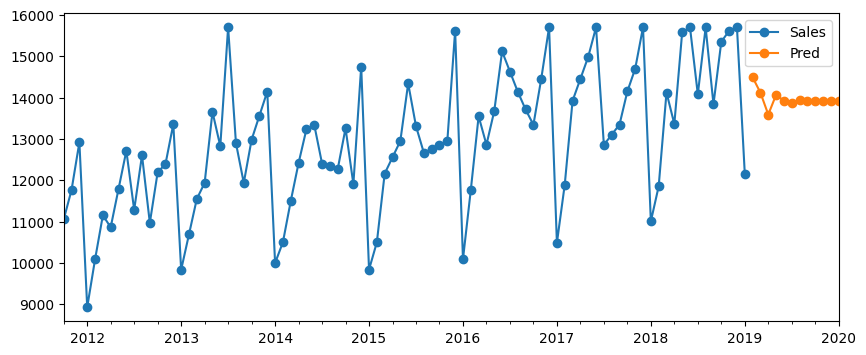

In [27]:
df.tail(100).plot(style='-o')
plt.show()

<ipython-input-28-b580f0e0be2b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = pred[-12:]


MAE : 1675.069
RMSE : 1850.877
MAPE: 0.114


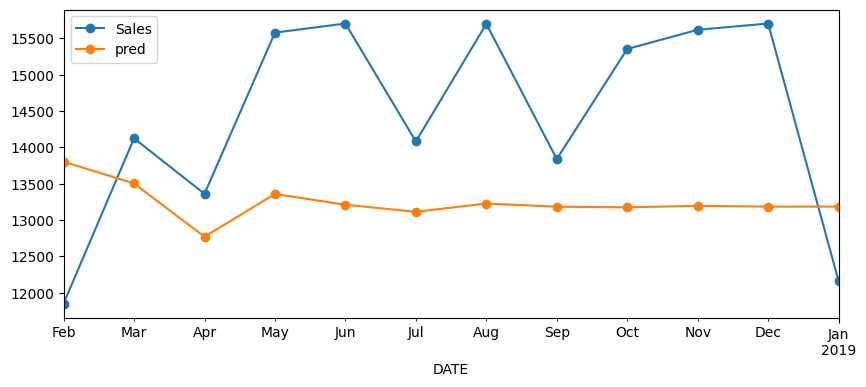

In [28]:
df = train_x.copy()
df = pd.concat([df,pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS'))[1:]])

pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

test_x['pred'] = pred[-12:]
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

#SES

In [29]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='DATE'>

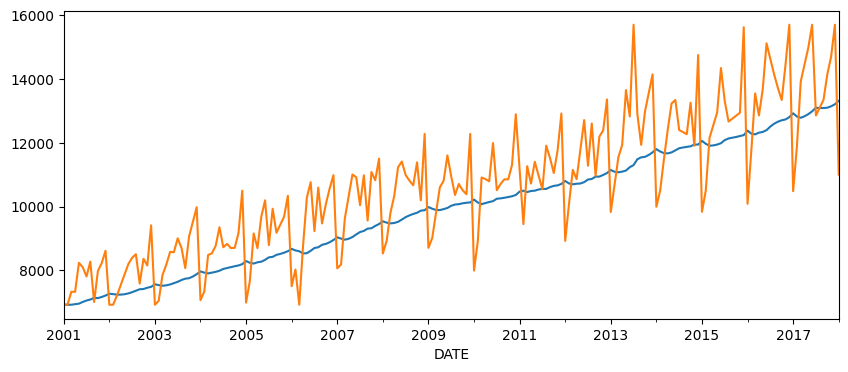

In [31]:
#alpha = smoothing level
model = pd.Series(sm.tsa.SimpleExpSmoothing(train_x).fit(smoothing_level=1/(2*12)).fittedvalues)

model.plot()
train_x.Sales.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-32-e38fdb9bb653>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps = 12)


MAE : 1607.766
RMSE : 1809.926
MAPE: 0.108


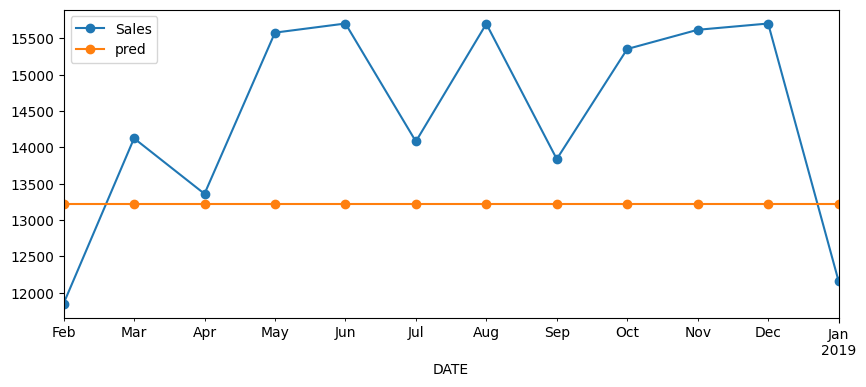

In [32]:
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


#Holt's Method (DES)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='DATE'>

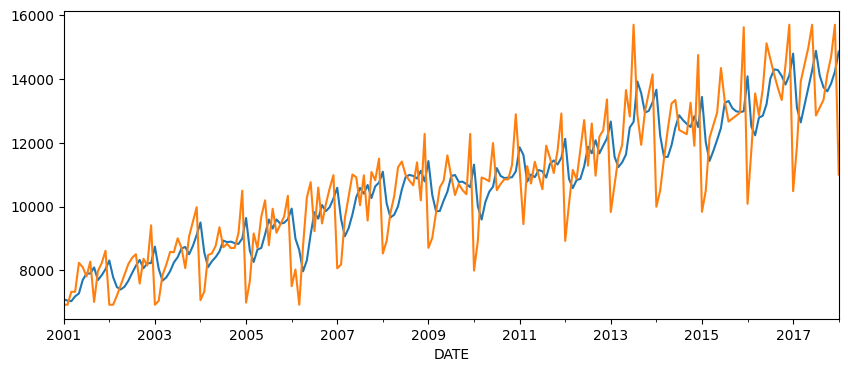

In [35]:
#alpha = smoothing level
model = pd.Series(sm.tsa.ExponentialSmoothing(train_x,trend="add").fit(smoothing_level=0.4).fittedvalues)

model.plot()
train_x.Sales.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-38-8249a57ba037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps = 12)


MAE : 1151.135
RMSE : 1337.664
MAPE: 0.082


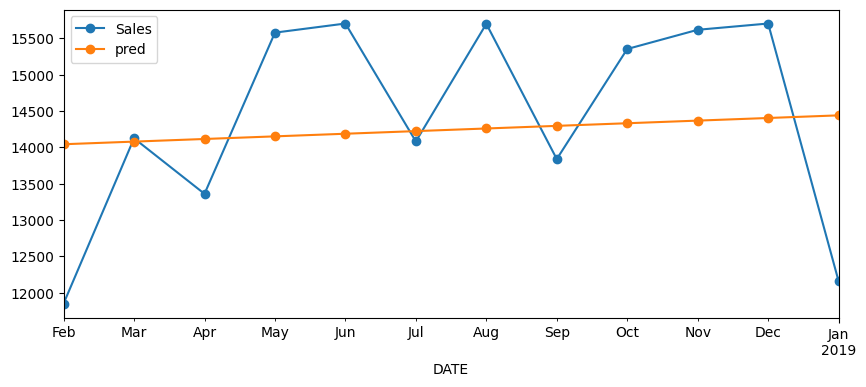

In [38]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

#Holt Winter's Method

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

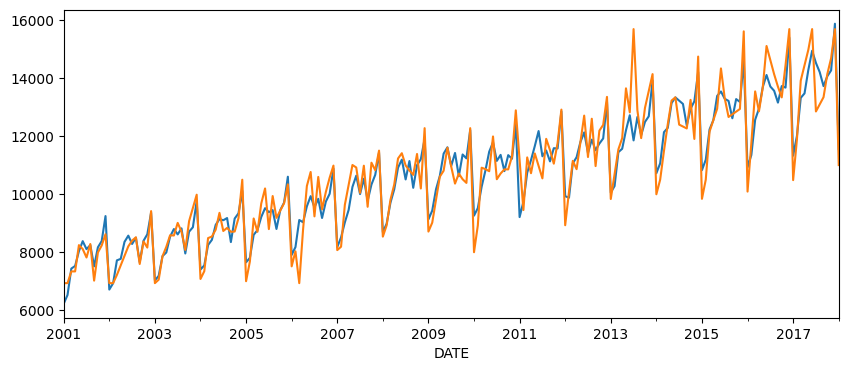

In [39]:
#alpha = smoothing level
model = pd.Series(sm.tsa.ExponentialSmoothing(train_x,trend="add",seasonal="add").fit(smoothing_level=1/(2*12)).fittedvalues)

model.plot()
train_x.Sales.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-41-69523ace969b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps = 12)


MAE : 583.598
RMSE : 671.856
MAPE: 0.04


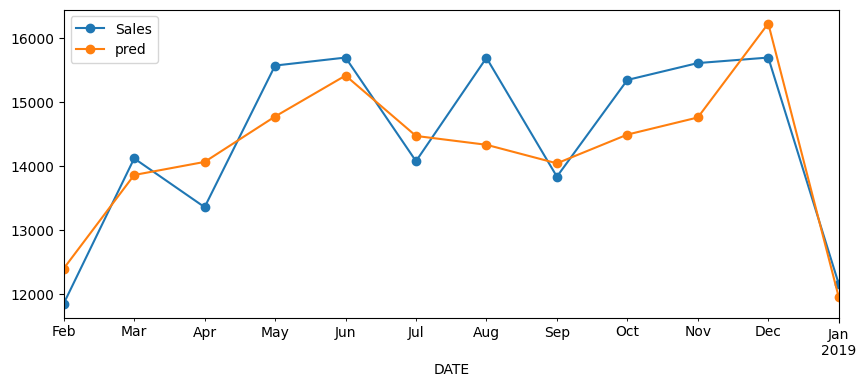

In [41]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add',seasonal="add").fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps = 12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])